Hola **Estela**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Proyecto Beta Bank

## Descripción del proyecto 

Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.

Necesitamos predecir si un cliente dejará el banco pronto. Tú tienes los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.

Crea un modelo con el máximo valor F1 posible. Para aprobar la revisión, necesitas un valor F1 de al menos 0.59. Verifica F1 para el conjunto de prueba. 

Además, debes medir la métrica AUC-ROC y compararla con el valor F1.

## Instrucciones del proyecto

Descarga y prepara los datos.  Explica el procedimiento.

Examina el equilibrio de clases. Entrena el modelo sin tener en cuenta el desequilibrio. Describe brevemente tus hallazgos.

Mejora la calidad del modelo. Asegúrate de utilizar al menos dos enfoques para corregir el desequilibrio de clases. Utiliza conjuntos de entrenamiento y validación para encontrar el mejor modelo y el mejor conjunto de parámetros. Entrena diferentes modelos en los conjuntos de entrenamiento y validación. Encuentra el mejor. Describe brevemente tus hallazgos.

Realiza la prueba final.

## Descripción de los datos

Puedes encontrar los datos en el archivo  /datasets/Churn.csv file. Descarga el conjunto de datos.

Características

RowNumber: índice de cadena de datos
CustomerId: identificador de cliente único
Surname: apellido
CreditScore: valor de crédito
Geography: país de residencia
Gender: sexo
Age: edad
Tenure: período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)
Balance: saldo de la cuenta
NumOfProducts: número de productos bancarios utilizados por el cliente
HasCrCard: el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)
IsActiveMember: actividad del cliente (1 - sí; 0 - no)
EstimatedSalary: salario estimado
Objetivo

Exited: El cliente se ha ido (1 - sí; 0 - no)

## Proyecto

### Descarga y prepara los datos

In [1]:
#importamos librerias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.metrics import precision_score, recall_score

In [2]:
#se cat¿rgaron los datos 
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [4]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


En la información del dataframe podemos ver que hay algunos datos ausentes en la columna de Tenure, y hay alguinos valores float que servirian mejor como enteros, como lo es en la columna Exited

In [5]:
#se eliminan las columnas que no nos sirven para el objetivo del proyecto
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
#se cambian a minusculas los nombres de las comlumnas para mayor facilidad de manejo 
data.columns = data.columns.str.lower()

In [6]:
#para mejor facilidad y claridad se renombran las columnas
data = data.rename(columns = 
               {'creditscore': 'credit_score', 
                'numofproducts': 'num_products', 
                'hascrcard': 'credit_card',
                'isactivemember': 'active_member',
                'estimatedsalary': 'estimated_salary'})

In [7]:
#rellenamos los valores nulos con la media 
data['tenure'] = data['tenure'].fillna(data['tenure'].mean())

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  float64
 5   balance           10000 non-null  float64
 6   num_products      10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [8]:
data.describe()

,credit_score,age,tenure,balance,num_products,credit_card,active_member,estimated_salary,exited
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.99769,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.76001,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.00000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.00000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,4.99769,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.00000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.00000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
data.duplicated().sum()

0

### Examina el equilibrio de clases. Entrena el modelo sin tener en cuenta el desequilibrio. Describe brevemente tus hallazgos.

0    0.7963
1    0.2037
Name: exited, dtype: float64


<AxesSubplot:>

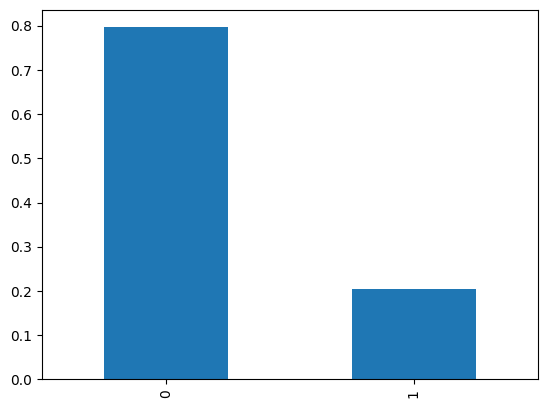

In [10]:
class_frequency = data['exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

podemos ver que si existe un desequulibrio de clases, hay aproximadamente un 70 % de 0 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente! Siempre en problemas de ML hay que revisar el balance de las clases a predecir ya que de esto depende si se aplica una u otra técnica
</div>

In [11]:
#codificar variables categoricas

encoder = OrdinalEncoder()
data_ordinal= pd.DataFrame(encoder.fit_transform(data), columns=data.columns)

In [12]:
# Codificación one-hot:

data_ohe = pd.get_dummies(data, drop_first = True)

# escalar variables numericas 

numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_products', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(data_ohe[numeric])

data_ohe[numeric] = scaler.transform(data_ohe[numeric])

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien realizado el procesamiento de los datos! Siempre hay que extraer la información necesaria de cada feature para luego enviar estos datos al modelo
</div>

In [13]:
target = data_ordinal['exited']
features = data_ordinal.drop('exited', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.20, random_state=12345)

features_train, features_val_test, target_train, target_val_test = train_test_split(features, target, test_size=0.40, random_state=12345)

In [14]:
#exactitud del modelo sin balance
target_pred_constant = pd.Series(0, index=target.index) # <escribe el código aquí >
print(accuracy_score(target, target_pred_constant))

0.7963


## Entrenamiento de modelos con desbalance de clases



### Regresión lógistica

In [15]:
model = LogisticRegression(random_state = 12345, solver = 'liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]

print('F1:', f1_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid))
print('Accuracy score:', accuracy_score(target_valid, predicted_valid))



F1: 0.2616487455197133
AUC-ROC: 0.7268767000510667
Accuracy score: 0.794


### Árbol de decisión

In [16]:
#Analizar las frecuencias de clase de las predicciones del árbol de decisión


model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]

print('F1:', f1_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid))
print('Accuracy score:', accuracy_score(target_valid, predicted_valid))



F1: 0.4514563106796116
AUC-ROC: 0.6507293005057535
Accuracy score: 0.774


### Bosque Aleatorio

In [17]:
model = RandomForestClassifier(random_state=12345, n_estimators=50)
model.fit(features_train,target_train)
predicted_valid = model.predict(features_valid)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]

print('F1:', f1_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid))
print('Accuracy score:', accuracy_score(target_valid, predicted_valid))

F1: 0.5478645066273933
AUC-ROC: 0.851675894894971
Accuracy score: 0.8465


Conclusión: 

En los entrenamientos de los modelos desbalanceados pudimos obtener los mejores valores del Bosque aleatorio, ya que tiene un F1 de 0.54, siendo el más alto de los 3 y teniendo como objetivo 0.59 no queda tan lejos. los valores de precisión t exactitud tampoco están tan lejos del 1 como los otros modelos. Sin embargo creo que al balancerlos podremos mejorar los valores de F1 y la exacitud de nuestros modelos. 



<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el entrenamiento! Se puede observar que el modelo no logra llegar a la métrica objetivo, aquí es donde entran técnicas cómo sobremuestro o submuestreo para adecuar los datos al problema y que los modelos logren ajustarse mejor
</div>

## Entrenamiento de modelos con balance de clase

### Regresión Lógistica

In [18]:
model = LogisticRegression(random_state = 12345, solver = 'liblinear', class_weight = 'balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]

print('F1:', f1_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid))
print('Accuracy score:', accuracy_score(target_valid, predicted_valid))

F1: 0.48166666666666663
AUC-ROC: 0.7474894702912588
Accuracy score: 0.689


In [19]:
#balance con sobremuestreo
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 5
)

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)

predicted_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.4694628403237674


In [20]:
for threshold in np.arange(0, 0.8, 0.02):
    predicted_valid = probabilities_one_valid > threshold# < escribe el código aquí >
    precision = precision_score(target_valid, predicted_valid)# < escribe el código aquí >
    recall = recall_score(target_valid, predicted_valid)# < escribe el código aquí >


    print(
        	'Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}'.format(
            	threshold, precision, recall
            )
        )

Threshold = 0.00 | Precision = 0.213, Recall = 1.000
Threshold = 0.02 | Precision = 0.213, Recall = 1.000
Threshold = 0.04 | Precision = 0.214, Recall = 1.000
Threshold = 0.06 | Precision = 0.214, Recall = 1.000
Threshold = 0.08 | Precision = 0.215, Recall = 1.000
Threshold = 0.10 | Precision = 0.217, Recall = 1.000
Threshold = 0.12 | Precision = 0.221, Recall = 1.000
Threshold = 0.14 | Precision = 0.225, Recall = 0.993
Threshold = 0.16 | Precision = 0.228, Recall = 0.986
Threshold = 0.18 | Precision = 0.234, Recall = 0.984
Threshold = 0.20 | Precision = 0.238, Recall = 0.965
Threshold = 0.22 | Precision = 0.245, Recall = 0.956
Threshold = 0.24 | Precision = 0.253, Recall = 0.946
Threshold = 0.26 | Precision = 0.260, Recall = 0.932
Threshold = 0.28 | Precision = 0.269, Recall = 0.923
Threshold = 0.30 | Precision = 0.280, Recall = 0.913
Threshold = 0.32 | Precision = 0.289, Recall = 0.902
Threshold = 0.34 | Precision = 0.298, Recall = 0.883
Threshold = 0.36 | Precision = 0.304, Recall =

Aunque el F1 mejoró en comparación con el modelo desbalanceado, sigue siendo baja, incluso podemos ver que es un mejodelo poco precioso, no es confiable. 

### Árbol de decisiones

In [21]:
model = DecisionTreeClassifier(random_state=12345, class_weight = 'balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]

print('F1:', f1_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid))
print('Accuracy score:', accuracy_score(target_valid, predicted_valid))

F1: 0.46634615384615385
AUC-ROC: 0.6600969820045827
Accuracy score: 0.778


In [22]:
for threshold in np.arange(0, 0.5, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    print('Threshold:', threshold, 'F1:', f1_score(target_valid,predicted_valid))

Threshold: 0.0 F1: 0.46634615384615385
Threshold: 0.02 F1: 0.46634615384615385
Threshold: 0.04 F1: 0.46634615384615385
Threshold: 0.06 F1: 0.46634615384615385
Threshold: 0.08 F1: 0.46634615384615385
Threshold: 0.1 F1: 0.46634615384615385
Threshold: 0.12 F1: 0.46634615384615385
Threshold: 0.14 F1: 0.46634615384615385
Threshold: 0.16 F1: 0.46634615384615385
Threshold: 0.18 F1: 0.46634615384615385
Threshold: 0.2 F1: 0.46634615384615385
Threshold: 0.22 F1: 0.46634615384615385
Threshold: 0.24 F1: 0.46634615384615385
Threshold: 0.26 F1: 0.46634615384615385
Threshold: 0.28 F1: 0.46634615384615385
Threshold: 0.3 F1: 0.46634615384615385
Threshold: 0.32 F1: 0.46634615384615385
Threshold: 0.34 F1: 0.46634615384615385
Threshold: 0.36 F1: 0.46634615384615385
Threshold: 0.38 F1: 0.46634615384615385
Threshold: 0.4 F1: 0.46634615384615385
Threshold: 0.42 F1: 0.46634615384615385
Threshold: 0.44 F1: 0.46634615384615385
Threshold: 0.46 F1: 0.46634615384615385
Threshold: 0.48 F1: 0.46634615384615385


In [23]:
#profundidad 
for depth in range(1,10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight = 'balanced')
    model.fit(features_train,target_train)
    predicted_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    print('max_depth =', depth, ':', 'F1:', f1_score(target_valid,predicted_valid), 'AUC-ROC =', roc_auc_score(target_valid, probabilities_one_valid))

max_depth = 1 : F1: 0.5117187499999999 AUC-ROC = 0.7003071444204082
max_depth = 2 : F1: 0.5480225988700566 AUC-ROC = 0.7562065356402168
max_depth = 3 : F1: 0.5480225988700566 AUC-ROC = 0.8097922941440079
max_depth = 4 : F1: 0.5439870863599677 AUC-ROC = 0.8304757835309251
max_depth = 5 : F1: 0.5977249224405378 AUC-ROC = 0.8291120206172367
max_depth = 6 : F1: 0.5612153708668455 AUC-ROC = 0.8044578372447224
max_depth = 7 : F1: 0.555956678700361 AUC-ROC = 0.7901584257769056
max_depth = 8 : F1: 0.5416267942583731 AUC-ROC = 0.7649667768892807
max_depth = 9 : F1: 0.530214424951267 AUC-ROC = 0.7529393110615168


En este caso el modelo tuvo mejores resultados. Cuando hicimos la prueba de profundidad itinerando entre 1-10, el resultado de 5 fue bastante bueno, ya que alcanzamos el f1 objetivo de 0.59 y un AUC-ROC de 0.82 que me parece que hasta ahora es el mejor modelo, pero hay que probar si con el bosque aletorio de puede mejorar. 

### Bosque Aleatorio balanceado 

In [24]:
model = RandomForestClassifier(random_state=12345, n_estimators=50, class_weight = 'balanced')
model.fit(features_train,target_train)
predicted_valid = model.predict(features_valid)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]

print('F1:', f1_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid))
print('Accuracy score:', accuracy_score(target_valid, predicted_valid))

F1: 0.5282442748091603
AUC-ROC: 0.8502406684224866
Accuracy score: 0.8455


In [25]:
best_F1 = 0
best_est = 0
for est in range(1, 100): # choose hyperparameter range
    model = RandomForestClassifier(random_state=12345, n_estimators=est, class_weight = 'balanced') # set number of trees
    model.fit(features_train,target_train)
    predicted_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    if f1_score(target_valid,predicted_valid) > best_F1:
        best_F1 = f1_score(target_valid,predicted_valid)
        best_est = est
    # Print loading pattern
   

print('n_estimators=', best_est, 'F1 =', best_F1)

n_estimators= 47 F1 = 0.5416036308623299


In [26]:
model = RandomForestClassifier(random_state=12345, n_estimators=47, class_weight = 'balanced')
model.fit(features_train,target_train)
predicted_valid = model.predict(features_valid)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]

print('F1:', f1_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid))
print('Accuracy score:', accuracy_score(target_valid, predicted_valid))

F1: 0.5416036308623299
AUC-ROC: 0.8499354594734625
Accuracy score: 0.8485


In [27]:
for threshold in np.arange(0, 0.5, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print('Threshold:', threshold, 'F1:', f1_score(target_valid,predicted_valid))

Threshold: 0.0 F1: 0.38620689655172413
Threshold: 0.02 F1: 0.38620689655172413
Threshold: 0.04 F1: 0.42078451349974527
Threshold: 0.06 F1: 0.45546786922209703
Threshold: 0.08 F1: 0.4805352798053528
Threshold: 0.1 F1: 0.5061969993476843
Threshold: 0.12 F1: 0.5342756183745583
Threshold: 0.14 F1: 0.5569044006069803
Threshold: 0.16 F1: 0.5695897023330652
Threshold: 0.18 F1: 0.5772495755517827
Threshold: 0.2 F1: 0.5913200723327305
Threshold: 0.22 F1: 0.5952153110047846
Threshold: 0.24 F1: 0.6006066734074823
Threshold: 0.26 F1: 0.6093418259023354
Threshold: 0.28 F1: 0.6119733924611974
Threshold: 0.3 F1: 0.6085946573751453
Threshold: 0.32 F1: 0.6137184115523466
Threshold: 0.34 F1: 0.6137184115523466
Threshold: 0.36 F1: 0.5987421383647799
Threshold: 0.38 F1: 0.5906735751295337
Threshold: 0.4 F1: 0.5702811244979921
Threshold: 0.42 F1: 0.5550906555090656
Threshold: 0.44 F1: 0.5509325681492109
Threshold: 0.46 F1: 0.5513196480938416
Threshold: 0.48 F1: 0.5440956651718983


Con un Threshold de 0.28 obtenemos el F1 más alto, que es igual a 0.6219. vamos a elegir ese valor para el modelo final 

In [28]:
# Modelo final
probabilities_test = model.predict_proba(features_val_test)
probabilities_one_test = probabilities_test[:, 1]
predicted_test = probabilities_one_test > 0.28
auc_roc = roc_auc_score(target_val_test, probabilities_one_test)

print('F1:', f1_score(target_val_test,predicted_test))
print('AUC-ROC:', auc_roc)
print('Accuracy:', accuracy_score(target_val_test,predicted_test))

F1: 0.5970819304152638
AUC-ROC: 0.8381842415400349
Accuracy: 0.8205


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Utilizar sobremuestreo o submuestreo o el balanceo de clases en los parámetros del modelo puede ayudar a los modelos a "entender" cómo hacer las predicciones, también te puedes apoyar de los parámetros de los modelos para mejorar estos resultados
</div>

## Conclusiones

En conclusión, el mejor modelo es el de Bosque Aleatorio Balanceado. 

Los valores que nos arroja fueron los mejores de todas las pruebas
F1= 0.59 cumpliendo el objetivo 
con un AUC-ROC de 0.83 siendo también el más alto obtenido y una exactitud de 0.82
Sabemos que es un modelo que tendrá un margen de error, sin embargo es bajo y podrá predecir lcuando un cliente quiera abandonar el bando y se le pueda dar el seguimiento necesario para que cambie de opinión. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te felicito por el trabajo realizado Estela, se nota que conoces las métricas de evaluación y planteas conclusionens muy acertadas en cuanto a los resultados. Es importante siempre en un problema de ML identificar el balance entre las clases de tu variable objetivo para poder escoger la métrica correcta ya que para datasets desbalanceados la métrica de accuracy suele presentar buenos valores pero en realidad las predicciones no son buenas y es por la forma en cómo se calcula esta métrica que puede llevar a interpretaciones erroneas en cambio el f1-score es la ideal para este tipo de casos ya que maneja mejor este tipo de problemas.
    
    
Saludos!
</div>